### Data Cleaning and Exploratory Analysis 



### Dataset: Lending Club data

https://www.lendingclub.com/info/download-data.action

Years of data to download: 2007-2011



Here are the  guidelines:

    View the data 
    Find the columns that are useful (may be null columns) and the ones that are not 
    Delete the columns that are not needed
    Clean columns values like int_rate and term by removing the string part and convert the column to numeric.
    Identify the columns containing useful information, they would be the features. 
    Visualize the important features


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df=pd.read_csv('Loan.csv')

C:\New folder\lib\site-packages\IPython\core\interactiveshell.py:3063: DtypeWarning: Columns (19,55) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,8.873790e+05,8.873790e+05,887379.000000,887379.000000,887379.000000,887379.000000,887379.000000,8.873750e+05,887379.000000,887350.000000,...,21372.000000,18617.000000,21372.000000,21372.000000,21372.000000,21372.000000,8.171030e+05,21372.000000,21372.000000,21372.000000
mean,3.246513e+07,3.500182e+07,14755.264605,14741.877625,14702.464383,13.246740,436.717127,7.502759e+04,18.157039,0.314442,...,36552.811389,71.535317,1.389060,2.975482,5887.979740,60.831939,3.206862e+04,0.943945,1.537058,1.977307
std,2.282734e+07,2.411335e+07,8435.455601,8429.897657,8442.106732,4.381867,244.186593,6.469830e+04,17.190626,0.862244,...,43103.833619,23.022862,1.520129,2.631886,5284.701239,20.013254,3.749826e+04,1.446872,2.723339,2.874067
min,5.473400e+04,7.047300e+04,500.000000,500.000000,0.000000,5.320000,15.670000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000
25%,9.206643e+06,1.087713e+07,8000.000000,8000.000000,8000.000000,9.990000,260.705000,4.500000e+04,11.910000,0.000000,...,10251.500000,58.600000,0.000000,1.000000,2411.000000,47.700000,1.390000e+04,0.000000,0.000000,0.000000
50%,3.443327e+07,3.709528e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.650000,0.000000,...,24684.500000,74.900000,1.000000,2.000000,4483.000000,61.900000,2.370000e+04,0.000000,0.000000,2.000000
75%,5.490814e+07,5.847135e+07,20000.000000,20000.000000,20000.000000,16.200000,572.600000,9.000000e+04,23.950000,0.000000,...,47858.000000,87.600000,2.000000,4.000000,7771.500000,75.200000,3.980000e+04,1.000000,2.000000,3.000000
max,6.861706e+07,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,878459.000000,223.300000,22.000000,43.000000,127305.000000,151.400000,9.999999e+06,17.000000,35.000000,32.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           887379 non-null  int64  
 1   member_id                    887379 non-null  int64  
 2   loan_amnt                    887379 non-null  float64
 3   funded_amnt                  887379 non-null  float64
 4   funded_amnt_inv              887379 non-null  float64
 5   term                         887379 non-null  object 
 6   int_rate                     887379 non-null  float64
 7   installment                  887379 non-null  float64
 8   grade                        887379 non-null  object 
 9   sub_grade                    887379 non-null  object 
 10  emp_title                    835917 non-null  object 
 11  emp_length                   842554 non-null  object 
 12  home_ownership               887379 non-null  object 
 13 

In [6]:
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose',
       'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'out_prncp',
       'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp',
       'total_rec_int', 'total_rec_late_fee', 'recoveries',
       'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt',
       'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint',
    

In [7]:
data=df.drop(columns=['pymnt_plan','url','out_prncp','policy_code','application_type','annual_inc_joint','dti_joint','verification_status_joint','acc_now_delinq'])

In [8]:
data['recovery']=data['total_rec_late_fee']+data['recoveries']+data['collection_recovery_fee']

In [9]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       

In [10]:
null_columns=data.columns[data.isnull().any()]
null_columns

Index(['emp_title', 'emp_length', 'annual_inc', 'desc', 'title', 'delinq_2yrs',
       'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_util',
       'total_acc', 'last_pymnt_d', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util',
       'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m'],
      dtype='object')

In [11]:
data[null_columns].isnull().sum()

emp_title                       51462
emp_length                      44825
annual_inc                          4
desc                           761351
title                             152
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         454312
mths_since_last_record         750326
open_acc                           29
pub_rec                            29
revol_util                        502
total_acc                          29
last_pymnt_d                    17659
next_pymnt_d                   252971
last_credit_pull_d                 53
collections_12_mths_ex_med        145
mths_since_last_major_derog    665676
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    866007
open_il_6m                     866007
open_il_12m                    866007
open_il_24m                    866007
mths_since_rcnt_il             866569
total_bal_il

In [12]:
print(data[data.isnull().any(axis=1)][null_columns].head())

                  emp_title emp_length  annual_inc  \
0                       NaN  10+ years     24000.0   
1                     Ryder   < 1 year     30000.0   
2                       NaN  10+ years     12252.0   
3       AIR RESOURCES BOARD  10+ years     49200.0   
4  University Medical Group     1 year     80000.0   

                                                desc                 title  \
0    Borrower added on 12/22/11 > I need to upgra...              Computer   
1    Borrower added on 12/22/11 > I plan to use t...                  bike   
2                                                NaN  real estate business   
3    Borrower added on 12/21/11 > to pay for prop...              personel   
4    Borrower added on 12/21/11 > I plan on combi...              Personal   

   delinq_2yrs earliest_cr_line  inq_last_6mths  mths_since_last_delinq  \
0          0.0         Jan-1985             1.0                     NaN   
1          0.0         Apr-1999             5.0         

In [13]:
data.fillna

<bound method DataFrame.fillna of               id  member_id  loan_amnt  funded_amnt  funded_amnt_inv  \
0        1077501    1296599     5000.0       5000.0           4975.0   
1        1077430    1314167     2500.0       2500.0           2500.0   
2        1077175    1313524     2400.0       2400.0           2400.0   
3        1076863    1277178    10000.0      10000.0          10000.0   
4        1075358    1311748     3000.0       3000.0           3000.0   
...          ...        ...        ...          ...              ...   
887374  36371250   39102635    10000.0      10000.0          10000.0   
887375  36441262   39152692    24000.0      24000.0          24000.0   
887376  36271333   38982739    13000.0      13000.0          13000.0   
887377  36490806   39222577    12000.0      12000.0          12000.0   
887378  36271262   38982659    20000.0      20000.0          20000.0   

              term  int_rate  installment grade sub_grade  ... il_util  \
0        36 months     10.6

In [14]:
data.dtypes

id                    int64
member_id             int64
loan_amnt           float64
funded_amnt         float64
funded_amnt_inv     float64
                     ...   
total_rev_hi_lim    float64
inq_fi              float64
total_cu_tl         float64
inq_last_12m        float64
recovery            float64
Length: 66, dtype: object

In [15]:
data.int_rate = pd.to_numeric(data.int_rate, errors='coerce').fillna(0).astype(np.int64)

In [16]:
data['int_rate'].dtypes

dtype('int64')

In [17]:
data.term = pd.to_numeric(data.term, errors='coerce').fillna(0).astype(np.int64)

In [18]:
data['term'].dtypes

dtype('int64')

In [19]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       

In [20]:
data_imp_features=['id','member_id','loan_amnt','funded_amnt_inv','term','int_rate','installment','emp_title','annual_inc','loan_status','recovery','purpose','total_pymnt_inv','total_rec_prncp','total_rec_prncp']

In [21]:
data.emp_length.value_counts()

10+ years    291569
2 years       78870
< 1 year      70605
3 years       70026
1 year        57095
5 years       55704
4 years       52529
7 years       44594
8 years       43955
6 years       42950
9 years       34657
Name: emp_length, dtype: int64

In [22]:
data.verification_status.value_counts()

Source Verified    329558
Verified           291071
Not Verified       266750
Name: verification_status, dtype: int64

In [23]:
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'loan_status', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m',
       'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il',
       

In [24]:
df_imp_features_data=data.drop(columns=['grade','sub_grade','emp_length','home_ownership','desc','zip_code','addr_state','dti','delinq_2yrs','earliest_cr_line','inq_last_6mths','mths_since_last_delinq','mths_since_last_record','open_acc','pub_rec','revol_bal','revol_util','initial_list_status','total_pymnt','collections_12_mths_ex_med', 'mths_since_last_major_derog','tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m','open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il','il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util','total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m','total_rec_late_fee', 'recoveries', 'collection_recovery_fee'])

In [25]:
df_imp_features_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_title,annual_inc,...,total_acc,out_prncp_inv,total_pymnt_inv,total_rec_prncp,total_rec_int,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,recovery
0,1077501,1296599,5000.0,5000.0,4975.0,0,10,162.87,NaN,24000.0,...,9.0,0.0,5831.78,5000.00,861.07,Jan-2015,171.62,NaN,Jan-2016,0.00
1,1077430,1314167,2500.0,2500.0,2500.0,0,15,59.83,Ryder,30000.0,...,4.0,0.0,1008.71,456.46,435.17,Apr-2013,119.66,NaN,Sep-2013,118.19
2,1077175,1313524,2400.0,2400.0,2400.0,0,15,84.33,NaN,12252.0,...,10.0,0.0,3003.65,2400.00,603.65,Jun-2014,649.91,NaN,Jan-2016,0.00
3,1076863,1277178,10000.0,10000.0,10000.0,0,13,339.31,AIR RESOURCES BOARD,49200.0,...,37.0,0.0,12226.30,10000.00,2209.33,Jan-2015,357.48,NaN,Jan-2015,16.97
4,1075358,1311748,3000.0,3000.0,3000.0,0,12,67.79,University Medical Group,80000.0,...,38.0,766.9,3242.17,2233.10,1009.07,Jan-2016,67.79,Feb-2016,Jan-2016,0.00


Text(0.5, 1.0, 'Bar plot of the count of numeric features')

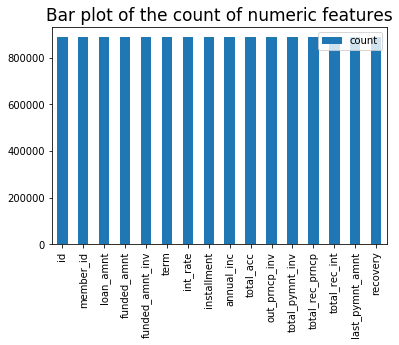

In [26]:
d=df_imp_features_data.describe()
dT=d.T
dT.plot.bar(y='count')
plt.title("Bar plot of the count of numeric features",fontsize=17)

Text(0, 0.5, 'Count')

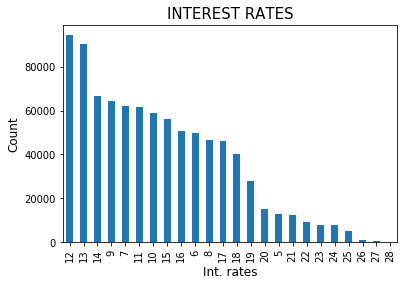

In [27]:
df_imp_features_data.int_rate.value_counts().plot(kind="bar")
plt.title('INTEREST RATES',fontsize=15)
plt.xlabel('Int. rates',fontsize=12)
plt.ylabel('Count',fontsize=12)


In [ ]:
df_imp_features_data.installment.value_counts().plot(kind="bar")
plt.title('INSTALLMENTS',fontsize=15)
plt.xlabel('Installment',fontsize=12)
plt.ylabel('Count',fontsize=12)


Text(0, 0.5, 'Count')

In [ ]:
df_imp_features_data.recovery.value_counts().plot(kind="bar")
plt.title('RECOVERY',fontsize=15)
plt.xlabel('Recovered',fontsize=12)
plt.ylabel('Count',fontsize=12)
